<a href="https://colab.research.google.com/github/AshanMSilva/ML-individual-project/blob/main/ML_individual_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Connect Google Drive


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Import Packages

In [71]:
import pandas as pd
import geopy
from geopy.geocoders import Nominatim
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns
import statistics
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from collections import Counter


# Import Datasets

In [4]:
training_features_path = '/content/drive/MyDrive/ML-individual-project/training_features.csv'
training_labels_path ="/content/drive/MyDrive/ML-individual-project/training_labels.csv"
test_features_path = "/content/drive/MyDrive/ML-individual-project/test_features.csv"

In [5]:
training_features = pd.read_csv(training_features_path)
training_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59400 entries, 0 to 59399
Data columns (total 40 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     59400 non-null  int64  
 1   amount_tsh             59400 non-null  float64
 2   date_recorded          59400 non-null  object 
 3   funder                 55765 non-null  object 
 4   gps_height             59400 non-null  int64  
 5   installer              55745 non-null  object 
 6   longitude              59400 non-null  float64
 7   latitude               59400 non-null  float64
 8   wpt_name               59400 non-null  object 
 9   num_private            59400 non-null  int64  
 10  basin                  59400 non-null  object 
 11  subvillage             59029 non-null  object 
 12  region                 59400 non-null  object 
 13  region_code            59400 non-null  int64  
 14  district_code          59400 non-null  int64  
 15  lg

In [6]:
training_labels = pd.read_csv(training_labels_path)
training_labels.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59400 entries, 0 to 59399
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            59400 non-null  int64 
 1   status_group  59400 non-null  object
dtypes: int64(1), object(1)
memory usage: 928.2+ KB


In [7]:
test_features = pd.read_csv(test_features_path)
test_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14850 entries, 0 to 14849
Data columns (total 40 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     14850 non-null  int64  
 1   amount_tsh             14850 non-null  float64
 2   date_recorded          14850 non-null  object 
 3   funder                 13981 non-null  object 
 4   gps_height             14850 non-null  int64  
 5   installer              13973 non-null  object 
 6   longitude              14850 non-null  float64
 7   latitude               14850 non-null  float64
 8   wpt_name               14850 non-null  object 
 9   num_private            14850 non-null  int64  
 10  basin                  14850 non-null  object 
 11  subvillage             14751 non-null  object 
 12  region                 14850 non-null  object 
 13  region_code            14850 non-null  int64  
 14  district_code          14850 non-null  int64  
 15  lg

# Pre Processing

In [8]:
whole_dateframe = training_features
wd =whole_dateframe.join(training_labels['status_group'])

## value counts

In [9]:
wd['amount_tsh'].value_counts()

0.0         41639
500.0        3102
50.0         2472
1000.0       1488
20.0         1463
            ...  
8500.0          1
6300.0          1
220.0           1
138000.0        1
12.0            1
Name: amount_tsh, Length: 98, dtype: int64

In [10]:
wd['gps_height'].value_counts()

 0       20438
-15         60
-16         55
-13         55
-20         52
         ...  
 2285        1
 2424        1
 2552        1
 2413        1
 2385        1
Name: gps_height, Length: 2428, dtype: int64

In [11]:
wd['longitude'].value_counts()

0.000000     1812
37.540901       2
33.010510       2
39.093484       2
32.972719       2
             ... 
37.579803       1
33.196490       1
34.017119       1
33.788326       1
30.163579       1
Name: longitude, Length: 57516, dtype: int64

In [12]:
wd['latitude'].value_counts()

-2.000000e-08    1812
-6.985842e+00       2
-3.797579e+00       2
-6.981884e+00       2
-7.104625e+00       2
                 ... 
-5.726001e+00       1
-9.646831e+00       1
-8.124530e+00       1
-2.535985e+00       1
-2.598965e+00       1
Name: latitude, Length: 57517, dtype: int64

In [13]:
wd['permit'].value_counts()

True     38852
False    17492
Name: permit, dtype: int64

## group by

In [14]:
wd.groupby(['extraction_type', 'extraction_type_group', 'extraction_type_class']).size()

extraction_type            extraction_type_group  extraction_type_class
afridev                    afridev                handpump                  1770
cemo                       other motorpump        motorpump                   90
climax                     other motorpump        motorpump                   32
gravity                    gravity                gravity                  26780
india mark ii              india mark ii          handpump                  2400
india mark iii             india mark iii         handpump                    98
ksb                        submersible            submersible               1415
mono                       mono                   motorpump                 2865
nira/tanira                nira/tanira            handpump                  8154
other                      other                  other                     6430
other - mkulima/shinyanga  other handpump         handpump                     2
other - play pump          other hand

In [15]:
wd.groupby(['water_quality', 'quality_group']).size()

water_quality       quality_group
coloured            colored            490
fluoride            fluoride           200
fluoride abandoned  fluoride            17
milky               milky              804
salty               salty             4856
salty abandoned     salty              339
soft                good             50818
unknown             unknown           1876
dtype: int64

In [16]:
wd.groupby(['management', 'management_group']).size()

management        management_group
company           commercial            685
other             other                 844
other - school    other                  99
parastatal        parastatal           1768
private operator  commercial           1971
trust             commercial             78
unknown           unknown               561
vwc               user-group          40507
water authority   commercial            904
water board       user-group           2933
wua               user-group           2535
wug               user-group           6515
dtype: int64

In [55]:
training_features.groupby(['region', 'region_code','subvillage']).size()

region  region_code  subvillage
Arusha  2            Afya          15
                     Ahara          1
                     Alairataat     3
                     Alakirikir     4
                     Alasai         1
                                   ..
Tanga   5            Morogoro       1
                     Rebenya        2
                     Temeke A       1
                     Ungulodi       1
                     Walambe        1
Length: 22661, dtype: int64

## Graphs

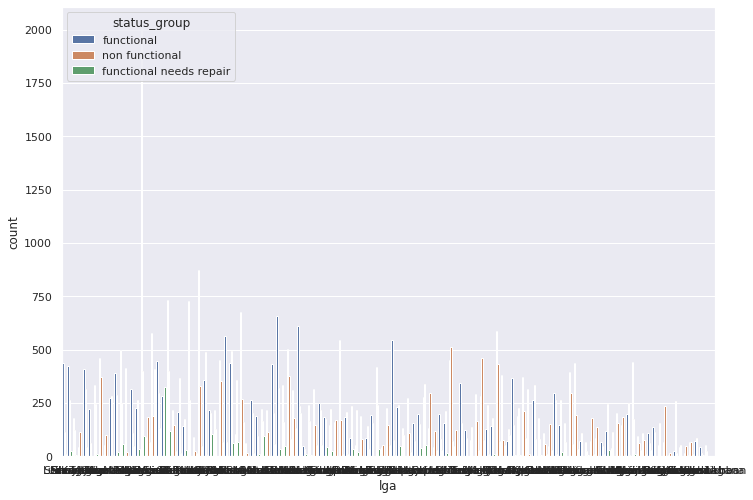

In [21]:
count_plot(wd, 'lga','status_group')

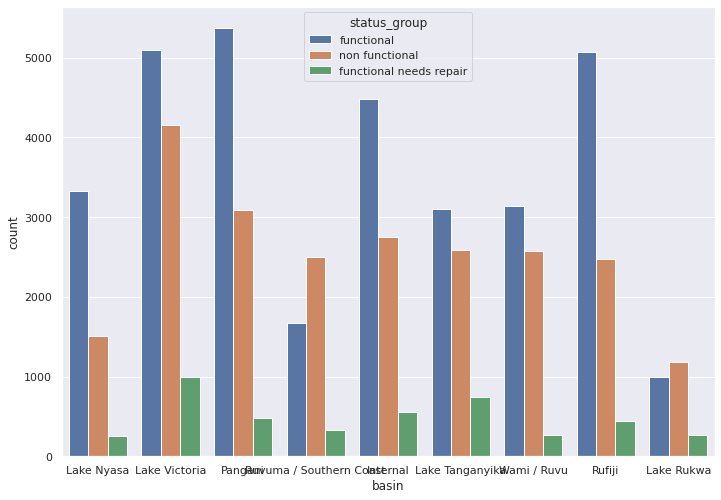

In [ ]:
count_plot(wd, 'basin','status_group')

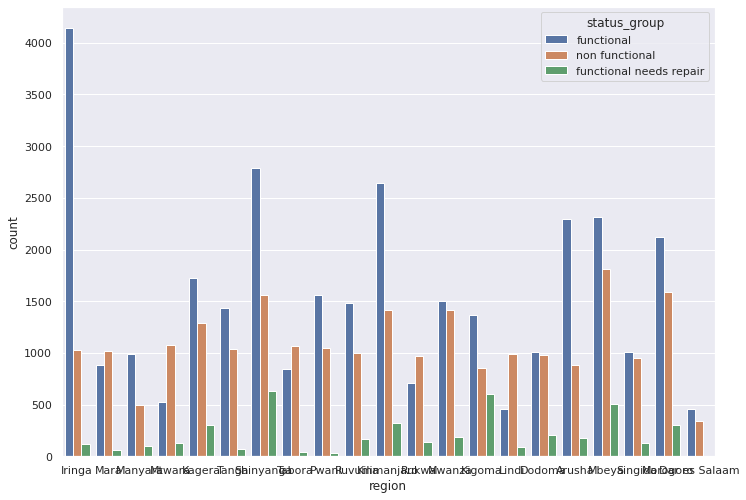

In [ ]:
count_plot(wd, 'region','status_group')

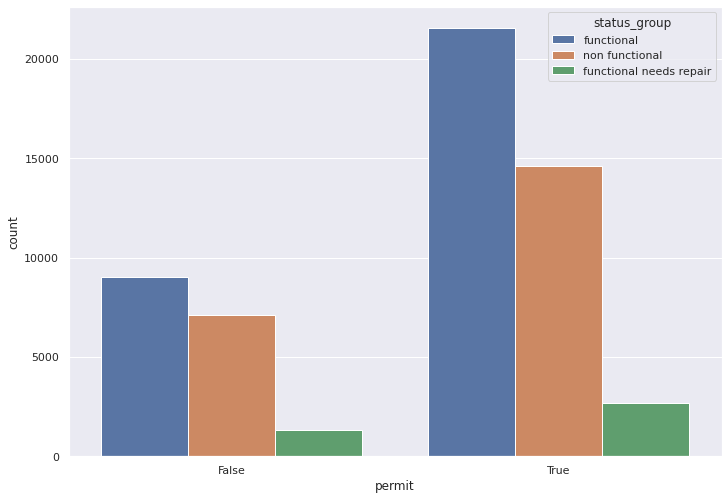

In [ ]:
count_plot(wd, 'permit','status_group')

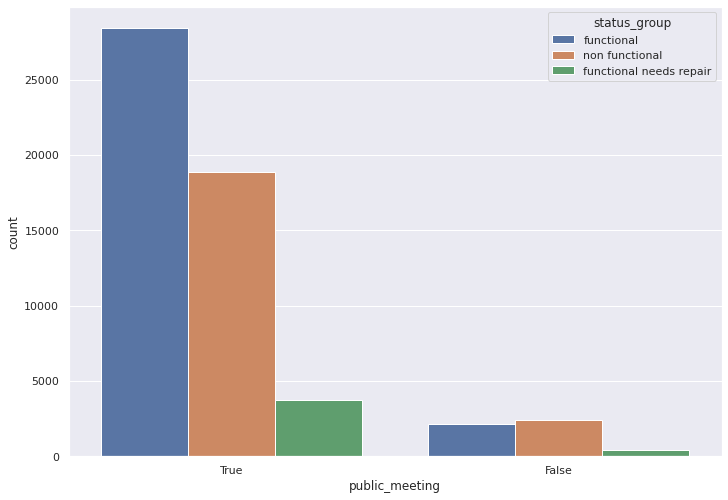

In [ ]:
count_plot(wd, 'public_meeting','status_group')

## functions

In [28]:
def get_encoded_labels(y):
  encoded_y = pd.get_dummies(y['status_group'])
  return encoded_y

In [29]:
def get_factorized_features(x,x_test,feature_name):
  x[feature_name], index = x[feature_name].factorize()
  x_test[feature_name], index_test = x_test[feature_name].factorize()
  return x,x_test

In [30]:
def get_categorized_encoded_features(x,x_test,feature_name):
  x_new = pd.get_dummies(x[feature_name])
  x_test_new = pd.get_dummies(x_test[feature_name])
  x.drop([feature_name])
  x.join(x_new)
  x_test.drop([feature_name])
  x_test.join(x_test_new)
  return x,x_test

In [31]:
def get_factorized_dataframe(x,x_test, factorized_features_list):
  x_temp = x
  x_test_temp = x_test
  for i in factorized_features_list:
    x_temp, x_test_temp = get_factorized_features(x_temp, x_test_temp, i)
  return x_temp, x_test_temp

In [32]:
def get_duration(x,x_test):
  x_temp = x
  x_test_temp = x_test
  train_count = 0
  test_count = 0
  for i in x["construction_year"]:
    x_temp["construction_year"][train_count] = 2021 -i
    train_count+=1
  for j in x_test["construction_year"]:
    x_test_temp["construction_year"][test_count] = 2021 -j
    test_count+=1
  return x_temp, x_test_temp

In [33]:
def plot_x_and_y(x,y):
  plt.bar(x, y)
  plt.show()

In [34]:
def count_plot(dataframe,x , hue):
  sns.set(rc={'figure.figsize':(11.7,8.27)})
  sns.countplot(data=dataframe,x=x,hue=hue)

In [35]:
def drop_unnecessary_features(training_features,test_features):
  training_features_dropped = training_features.drop(['id','permit','public_meeting','num_private','source_type', 'source_class', 'payment_type', 'waterpoint_type_group', 'quantity_group', 'water_quality', 'extraction_type_group', 'extraction_type_class', 'scheme_name',  'wpt_name', 'recorded_by','region_code', 'subvillage', 'management_group'], axis=1)
  test_features_dropped = test_features.drop(['id','permit','public_meeting','num_private','source_type', 'source_class', 'payment_type', 'waterpoint_type_group', 'quantity_group', 'water_quality', 'extraction_type_group', 'extraction_type_class', 'scheme_name', 'wpt_name', 'recorded_by','region_code','subvillage','management_group'], axis=1)
  return training_features_dropped, test_features_dropped

In [36]:
def get_year(training_features,test_features):
  temp_training_features = training_features
  temp_test_features = test_features
  train_count = 0
  test_count = 0
  for i in training_features["date_recorded"]:
    temp_training_features["date_recorded"][train_count] = 2021 -int(i[0:4])
    train_count+=1
  for j in test_features["date_recorded"]:
    temp_test_features["date_recorded"][test_count] = 2021-int(j[0:4])
    test_count+=1
  return temp_training_features, temp_test_features

In [37]:
# countries = []
# for i in range(len(training_features["longitude"])):
#   lon = training_features['longitude'][i]
#   lat = training_features['latitude'][i]
#   coordinates = str(lat)+", "+str(lon);
#   country = get_country(coordinates)
#   countries.append(country)

In [38]:
def get_country(coordinates):
  locator = Nominatim(user_agent="myGeocoder")
  location = locator.reverse(coordinates)
  try:
    return location.raw["address"]['country']
  except:
    return "unknown"
#coordinates = '53.480837, -2.244914'

In [39]:
def fix_missing_values_using_mean(x, feature_name):
  x_feature = x[feature_name]
  sorted_x = sorted(x_feature)
  zeros_count = sorted_x.count(0)
  first_index = sorted_x.index(0)
  without_zeros =[]
  if first_index == 0:
    without_zeros = sorted_x[zeros_count:]
  else:
    without_zeros = sorted_x[0:first_index]+sorted_x[first_index+zeros_count:]

  me = statistics.mean(without_zeros)
  rounded_mean = round(me)
  x_temp = x
  count = 0
  for i in x[feature_name]:
    if(i == 0):
      x_temp[feature_name][count] = rounded_mean
    count+=1
  return x_temp
  


In [40]:
def get_label_encode(y):
  le = LabelEncoder()
  le.fit(y)
  y = le.transform(y)
  return y


## Missing Values

In [41]:
wd= fix_missing_values_using_mean(wd, 'amount_tsh')
wd= fix_missing_values_using_mean(wd, 'gps_height')
wd= fix_missing_values_using_mean(wd, 'population')
wd= fix_missing_values_using_mean(wd, 'construction_year')

##test
test_features= fix_missing_values_using_mean(test_features, 'amount_tsh')
test_features= fix_missing_values_using_mean(test_features, 'gps_height')
test_features= fix_missing_values_using_mean(test_features, 'population')
test_features= fix_missing_values_using_mean(test_features, 'construction_year')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [47]:
wd['funder'].value_counts()

Government Of Tanzania    12719
Danida                     3114
Hesawa                     2202
Rwssp                      1374
World Bank                 1349
                          ...  
Rumaki                        1
Mwita                         1
Oxfarm Gb                     1
Tasaf And Mmem                1
Mikumi G                      1
Name: funder, Length: 1897, dtype: int64

In [42]:
wd['funder'].fillna('Government Of Tanzania', inplace=True)

In [50]:
test_features['funder'].value_counts()

Government Of Tanzania    2215
Danida                     793
Hesawa                     580
World Bank                 352
Kkkt                       336
                          ... 
Agness                       1
Bakari Hamisi                1
Mtuwasa And Community        1
Salim Aliamari               1
Makundya                     1
Name: funder, Length: 980, dtype: int64

In [51]:
test_features['funder'].fillna('Government Of Tanzania', inplace=True)

In [49]:
wd['installer'].value_counts()

DWE                             21057
Government                       1825
RWE                              1206
Commu                            1060
DANIDA                           1050
                                ...  
RO                                  1
TECH SUPPORT BEST CO                1
MAISHULE                            1
KARUMBA BIULDING COMPANY LTD        1
Masese                              1
Name: installer, Length: 2145, dtype: int64

In [43]:
wd['installer'].fillna('DWE', inplace=True)

In [52]:
test_features['installer'].value_counts()

DWE                              4349
Government                        457
RWE                               292
Commu                             287
DANIDA                            255
                                 ... 
Milenia                             1
Africa Muslum Agence Tanzania       1
AIMGGOLD                            1
Pangaboi Health Centre              1
Makundya                            1
Name: installer, Length: 1091, dtype: int64

In [53]:
test_features['installer'].fillna('DWE', inplace=True)

In [51]:
wd['scheme_management'].value_counts()

VWC                 40670
WUG                  5206
Water authority      3153
WUA                  2883
Water Board          2748
Parastatal           1680
Private operator     1063
Company              1061
Other                 766
SWC                    97
Trust                  72
None                    1
Name: scheme_management, dtype: int64

In [44]:
wd['scheme_management'].fillna('VWC', inplace=True)

In [54]:
test_features['scheme_management'].value_counts()

VWC                 9124
WUG                 1290
Water authority      822
Water Board          714
WUA                  668
Parastatal           444
Company              280
Private operator     263
Other                230
SWC                   26
Trust                 20
Name: scheme_management, dtype: int64

In [55]:
test_features['scheme_management'].fillna('VWC', inplace=True)

## Additional Features

In [45]:
wd, test_features = get_duration(wd, test_features)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


In [25]:
wd['construction_year'].value_counts()

24    21353
11     2645
13     2613
12     2533
21     2091
14     1587
15     1471
18     1286
10     1256
17     1123
9      1084
19     1075
43     1037
26     1014
16     1011
22      979
23      966
31      954
36      945
41      811
25      811
37      779
39      744
27      738
49      708
47      676
29      640
28      608
20      540
33      521
38      488
46      437
35      434
45      414
51      411
30      324
32      316
34      302
40      238
44      202
42      192
48      184
8       176
50      145
61      102
54       88
58       85
53       77
52       59
57       40
59       30
60       21
56       19
55       17
Name: construction_year, dtype: int64

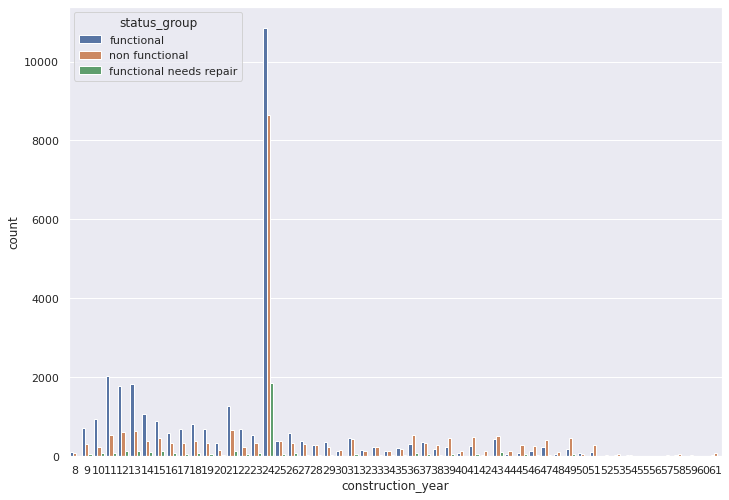

In [36]:
count_plot(wd, 'construction_year','status_group')

In [46]:
wd, test_features = get_year(wd, test_features)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


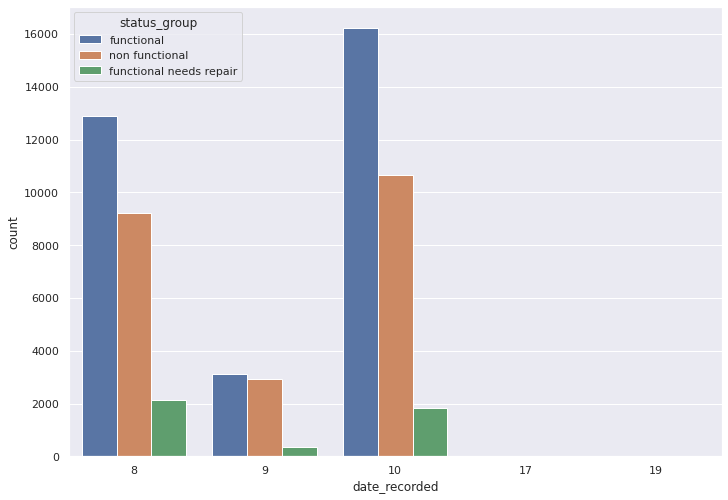

In [37]:
count_plot(wd, 'date_recorded','status_group')

## Remove Unnecessary Features

In [47]:
wd, test_features = drop_unnecessary_features(wd, test_features)

In [48]:
wd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59400 entries, 0 to 59399
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   amount_tsh         59400 non-null  float64
 1   date_recorded      59400 non-null  object 
 2   funder             59400 non-null  object 
 3   gps_height         59400 non-null  int64  
 4   installer          59400 non-null  object 
 5   longitude          59400 non-null  float64
 6   latitude           59400 non-null  float64
 7   basin              59400 non-null  object 
 8   region             59400 non-null  object 
 9   district_code      59400 non-null  int64  
 10  lga                59400 non-null  object 
 11  ward               59400 non-null  object 
 12  population         59400 non-null  int64  
 13  scheme_management  59400 non-null  object 
 14  construction_year  59400 non-null  int64  
 15  extraction_type    59400 non-null  object 
 16  management         594

In [56]:
test_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14850 entries, 0 to 14849
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   amount_tsh         14850 non-null  float64
 1   date_recorded      14850 non-null  object 
 2   funder             14850 non-null  object 
 3   gps_height         14850 non-null  int64  
 4   installer          14850 non-null  object 
 5   longitude          14850 non-null  float64
 6   latitude           14850 non-null  float64
 7   basin              14850 non-null  object 
 8   region             14850 non-null  object 
 9   district_code      14850 non-null  int64  
 10  lga                14850 non-null  object 
 11  ward               14850 non-null  object 
 12  population         14850 non-null  int64  
 13  scheme_management  14850 non-null  object 
 14  construction_year  14850 non-null  int64  
 15  extraction_type    14850 non-null  object 
 16  management         148

## Factorization

In [60]:
wd, test_features = get_factorized_dataframe(wd, test_features, ['funder','installer', 'basin','region','lga','ward','scheme_management','management', 'payment', 'quality_group', 'quantity', 'source', 'waterpoint_type','extraction_type'])

In [61]:
wd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59400 entries, 0 to 59399
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   amount_tsh         59400 non-null  float64
 1   date_recorded      59400 non-null  object 
 2   funder             59400 non-null  int64  
 3   gps_height         59400 non-null  int64  
 4   installer          59400 non-null  int64  
 5   longitude          59400 non-null  float64
 6   latitude           59400 non-null  float64
 7   basin              59400 non-null  int64  
 8   region             59400 non-null  int64  
 9   district_code      59400 non-null  int64  
 10  lga                59400 non-null  int64  
 11  ward               59400 non-null  int64  
 12  population         59400 non-null  int64  
 13  scheme_management  59400 non-null  int64  
 14  construction_year  59400 non-null  int64  
 15  extraction_type    59400 non-null  int64  
 16  management         594

In [62]:
y = get_label_encode(wd['status_group'])

In [65]:
Counter(y)

Counter({0: 32259, 1: 4317, 2: 22824})

In [82]:
Counter(training_labels['status_group'])

Counter({'functional': 32259,
         'functional needs repair': 4317,
         'non functional': 22824})

# Model

## Data preparation

In [67]:
labels = y
features = wd.drop(['status_group'], axis=1)

In [68]:
x_train, x_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=0)

## Grid search

In [74]:
param_grid = {
    'bootstrap': [True],
    'max_depth': [50, 100 ],
    'max_features': [8, 16],
    'min_samples_leaf': [5, 10],
    'min_samples_split': [8, 16],
    'n_estimators': [500, 1000],
}
num_folds = 3
rf = RandomForestClassifier()
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = num_folds, n_jobs = -1, verbose = 2)

In [75]:
grid_search.fit(x_train, y_train)
print (grid_search.best_params_)

Fitting 3 folds for each of 32 candidates, totalling 96 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
/usr/local/lib/python3.7/dist-packages/joblib/externals/loky/process_executor.py:691: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed: 44.9min
[Parallel(n_jobs=-1)]: Done  96 out of  96 | elapsed: 128.7min finished


{'bootstrap': True, 'max_depth': 50, 'max_features': 8, 'min_samples_leaf': 5, 'min_samples_split': 8, 'n_estimators': 500}


In [76]:
best_model = grid_search.best_estimator_

In [77]:
grid_search.best_score_

0.8007154882154883

## X test prediction

In [78]:
test_prediction = best_model.predict(x_test)

In [79]:
accuracy_score(y_test, test_prediction)

0.811026936026936

## Prediction

In [80]:
prediction = best_model.predict(test_features)

In [84]:
prediction

array([0, 0, 0, ..., 0, 0, 2])

In [85]:
pred_results = []
for i in prediction:
  if i == 0:
    pred_results.append('functional')
  elif i == 1:
    pred_results.append('functional needs repair')
  elif i == 2:
    pred_results.append('non functional')

In [86]:
Counter(pred_results)

Counter({'functional': 9297,
         'functional needs repair': 12,
         'non functional': 5541})

In [87]:
Counter(prediction)

Counter({0: 9297, 1: 12, 2: 5541})

## Save Results

In [88]:
results = pd.DataFrame()
tt = pd.read_csv(test_features_path)
results["id"] = tt['id']
results["status_group"] = pred_results
results.to_csv('output_8110.csv', index=False)